### **Importing libraries**


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

### **Preparing the dataset**

In [7]:
#import dataset
df = pd.read_csv("data_1.csv")    
df  

baseline value  accelerations  ...  histogram_tendency  fetal_health
0                132          0.006  ...                   0             1
1                133          0.003  ...                   0             1
2                134          0.003  ...                   1             1
3                132          0.007  ...                   1             1
4                131          0.005  ...                   1             1
...              ...            ...  ...                 ...           ...
1445             150          0.000  ...                   0             3
1446             150          0.000  ...                   0             3
1447             150          0.000  ...                   1             3
1448             150          0.000  ...                   0             3
1449             148          0.000  ...                   0             3

[1450 rows x 22 columns]

In [8]:
#check dimensions of dataset
df.shape

(1450, 22)

In [9]:
#dataset preview
df.head()

baseline value  accelerations  ...  histogram_tendency  fetal_health
0             132          0.006  ...                   0             1
1             133          0.003  ...                   0             1
2             134          0.003  ...                   1             1
3             132          0.007  ...                   1             1
4             131          0.005  ...                   1             1

[5 rows x 22 columns]

In [10]:
#check missing values
df.isnull().sum()    

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [11]:
#declaring target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

In [12]:
#checking target variable distribution
df['fetal_health'].value_counts()

1    1200
2     200
3      50
Name: fetal_health, dtype: int64



### **(A) Q1**
Classify the dataset using Decision Tree classifier and report precision, recall, accuracy and AUC-ROC curve on the test set. Visualize the Decision Tree (DT) and save the visualization as image (image name: DT_A_1.png/pdf/jpg).

In [13]:
#split X and y into training and testing set
#equal distribution using stratify 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [14]:
#function to plot AUC-ROC curve
def auc_roc_curve(tr_model):
  y1 = label_binarize(y, classes=[1,2,3])
  n_classes = y1.shape[1]
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.20)
  clf = OneVsRestClassifier(tr_model)
  y_score = clf.fit(X_train1, y_train1).predict_proba(X_test1)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  for i in range(3):
    plt.plot(fpr[i], tpr[i], label='class {0} (area = {1:0.2f})' ''.format(i+1, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

In [15]:
#instantiate the decision tree classifier model
tr_model = DecisionTreeClassifier(random_state=0)
#fit the model
tr_model = tr_model.fit(X_train, y_train)
#predicting test set results
y_pred = tr_model.predict(X_test)

In [16]:
#precision score average as macro
precision_score(y_test, y_pred, average='macro')

0.8472222222222223

In [17]:
#precision score average as micro
precision_score(y_test, y_pred, average='micro')

0.9344827586206896

In [18]:
#precision score average as weighted
precision_score(y_test, y_pred, average='weighted')

0.9344827586206896

In [19]:
#recall score average as micro
recall_score(y_test, y_pred, average='micro')

0.9344827586206896

In [20]:
#recall score average as macro
recall_score(y_test, y_pred, average='macro')

0.8472222222222223

In [21]:
#recall score average as weighted
recall_score(y_test, y_pred, average='weighted')

0.9344827586206896

In [22]:
#accuracy score
accuracy_score(y_test,y_pred)

0.9344827586206896

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.78      0.78      0.78        40
           3       0.80      0.80      0.80        10

    accuracy                           0.93       290
   macro avg       0.85      0.85      0.85       290
weighted avg       0.93      0.93      0.93       290



In [24]:
#auc_roc score
y_pred_prob = tr_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_prob, multi_class="ovr")

0.8897539682539682

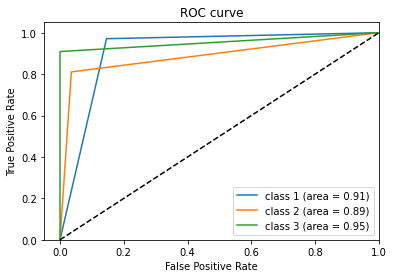

In [25]:
#auc_roc curve
auc_roc_curve(tr_model)

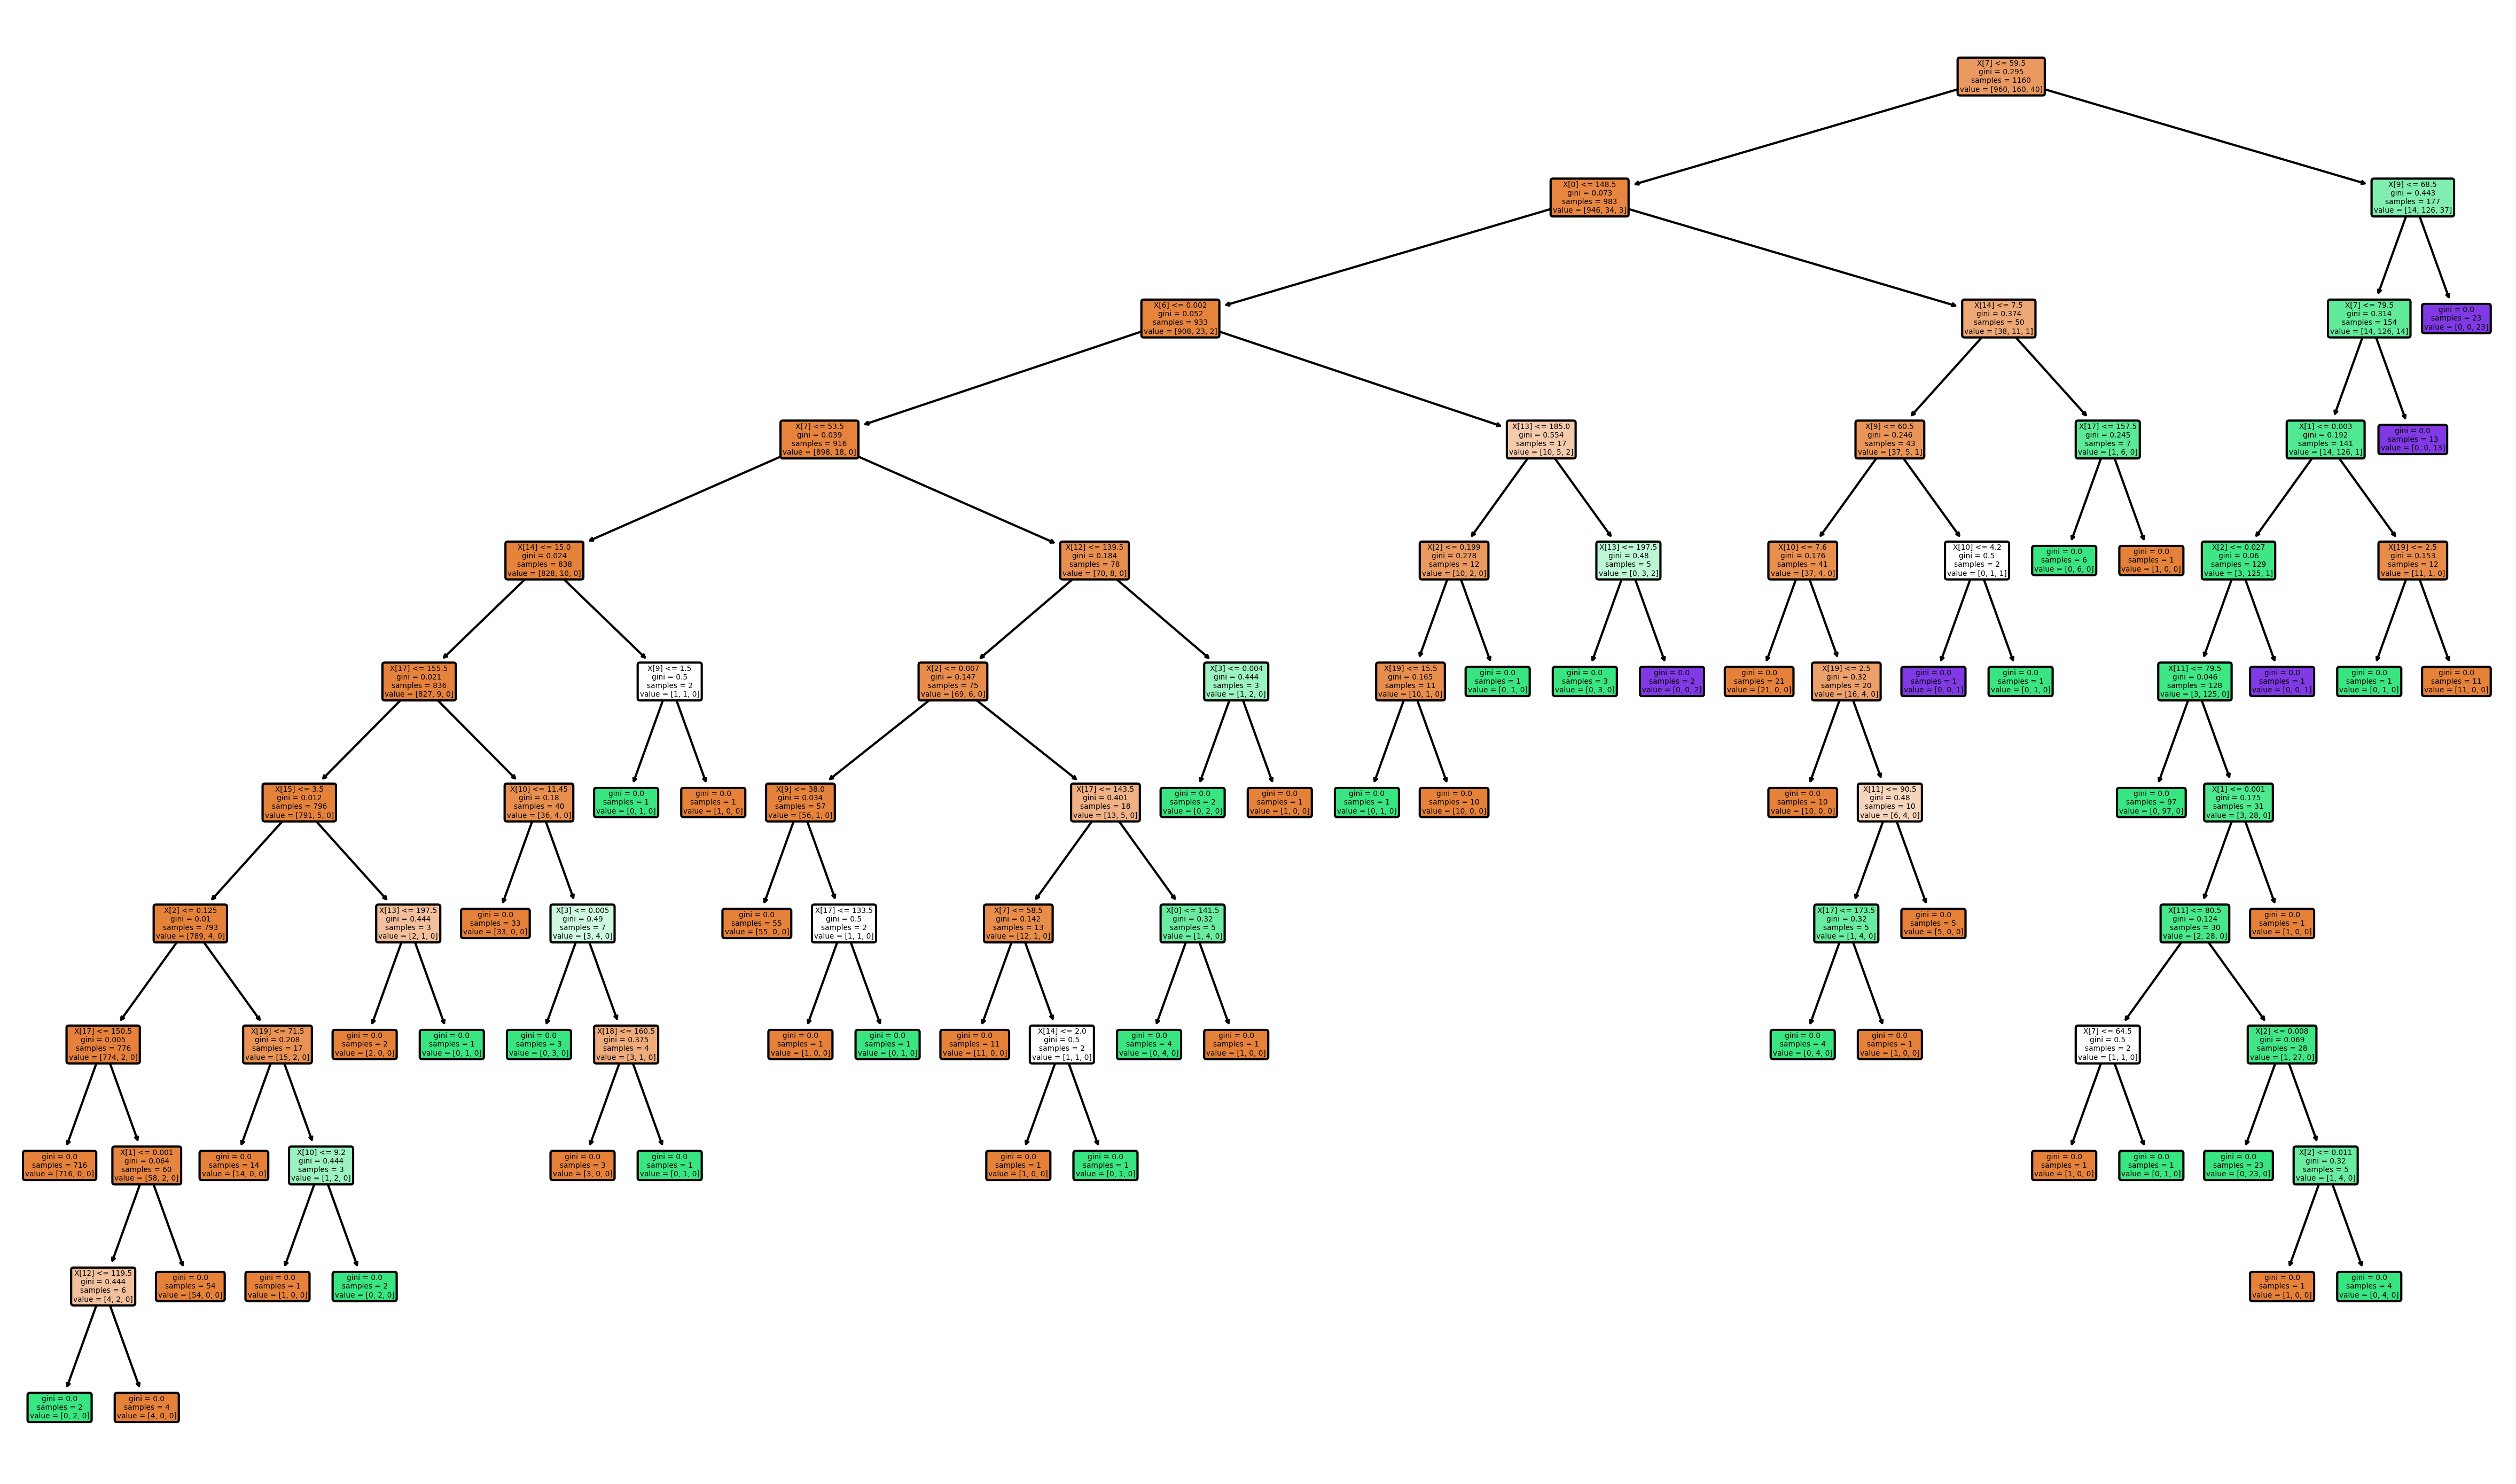

In [26]:
#visualize the decision tree
DT = plt.figure(figsize=(20,12), dpi=300)
tree.plot_tree(tr_model,rounded=True,filled=True)
plt.show()
#save the decision tree
DT.savefig('DT_A_1.png')

### **(A) Q2**
Train the Decision Tree classifier on different depths (Minimum 5 different depths) of tree and plot the accuracy vs depth graph.

In [27]:
#max depth as 2
tr_model1 = DecisionTreeClassifier(max_depth=2,random_state=0)
tr_model1.fit(X_train,y_train)
y_pred = tr_model1.predict(X_test)
a1=accuracy_score(y_test, y_pred)
print(a1)

0.9206896551724137


In [28]:
#max depth as 4
tr_model2=tree.DecisionTreeClassifier(max_depth=4, random_state=0)
tr_model2.fit(X_train,y_train)
y_pred = tr_model2.predict(X_test)
a2=accuracy_score(y_test, y_pred)
print(a2)

0.9413793103448276


In [29]:
#max depth as 7
tr_model3=tree.DecisionTreeClassifier(max_depth=7,random_state=0)
tr_model3.fit(X_train,y_train)
y_pred = tr_model3.predict(X_test)
a3=accuracy_score(y_test, y_pred)
print(a3)

0.9448275862068966


In [30]:
#max depth as 9
tr_model4=tree.DecisionTreeClassifier(max_depth=9,random_state=0)
tr_model4.fit(X_train,y_train)
y_pred = tr_model4.predict(X_test)
a4=accuracy_score(y_test, y_pred)
print(a4)

0.9379310344827586


In [31]:
#max depth as 11
tr_model5=tree.DecisionTreeClassifier(max_depth=11,random_state=0)
tr_model5.fit(X_train,y_train)
y_pred = tr_model5.predict(X_test)
a5=accuracy_score(y_test, y_pred)
print(a5)

0.9344827586206896


In [32]:
#max depth as 13
tr_model5=tree.DecisionTreeClassifier(max_depth=13,random_state=0)
tr_model5.fit(X_train,y_train)
y_pred = tr_model5.predict(X_test)
a6=accuracy_score(y_test, y_pred)
print(a6)

0.9344827586206896


Text(0.5, 0, 'max depth')

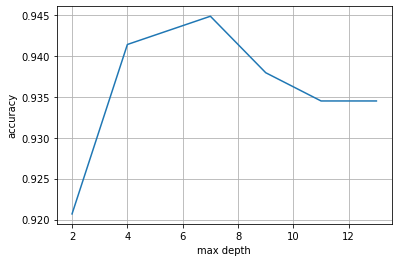

In [33]:
#plot accuracy vs depth graph
max_depth=[2,4,7,9,11,13]
accuracy=[a1,a2,a3,a4,a5,a6]
plt.plot(max_depth, accuracy) 
plt.grid()
#xlabel
plt.ylabel('accuracy') 
#ylabel
plt.xlabel('max depth') 

### **(A) Q3**
Taking the Decision Tree formulated in Q1, vary the following hyperparameters:-
Criterion, Splitter, min samples split, max depth, min samples leaf, max features (sqrt/log2), class
weight and max leaf nodes and report the observations (precision, recall, accuracy and AUC-ROC curve)
on each. You just have to change one hyperparameter in one experiment keeping others fixed and observe
the performance. Minimum observations to take should be 8. Report your best intuition/reasoning behind
positive/negative performance scores against the base model (Q1).

## **Experiment 1**

varying Criterion as entropy taking other hyperparameters as default

In [34]:
tr_model=DecisionTreeClassifier(criterion='entropy')
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.96       240
           2       0.74      0.78      0.76        40
           3       0.89      0.80      0.84        10

    accuracy                           0.93       290
   macro avg       0.86      0.85      0.85       290
weighted avg       0.93      0.93      0.93       290



In [35]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9310344827586207
Precision score:  0.9310344827586207
Recall score:  0.9310344827586207
AUC_ROC score:  0.8883214285714285


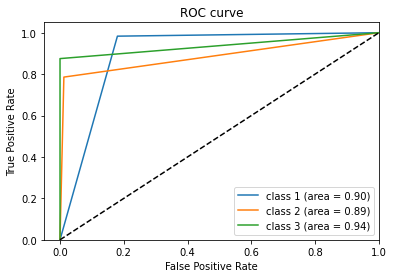

In [36]:
#auc_roc curve
auc_roc_curve(tr_model)

# **Experiment 2**


varying spiltter as random and taking other hyperparameters as default

In [37]:
tr_model=DecisionTreeClassifier(splitter='random')
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       240
           2       0.79      0.85      0.82        40
           3       0.75      0.60      0.67        10

    accuracy                           0.94       290
   macro avg       0.84      0.81      0.82       290
weighted avg       0.95      0.94      0.94       290



In [38]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9448275862068966
Precision score:  0.9448275862068966
Recall score:  0.9448275862068966
AUC_ROC score:  0.8803095238095239


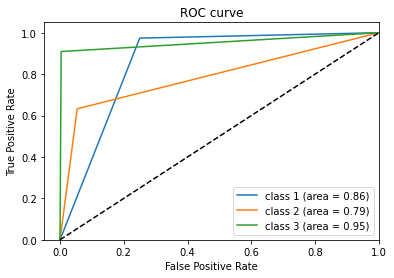

In [39]:
#auc_roc curve
auc_roc_curve(tr_model)

# **Experiment 3**

varying min sample split as 2 and taking other hyperparameters as default

In [40]:
tr_model=DecisionTreeClassifier(min_samples_split=3)
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.79      0.82      0.80        40
           3       0.89      0.80      0.84        10

    accuracy                           0.94       290
   macro avg       0.88      0.86      0.87       290
weighted avg       0.94      0.94      0.94       290



In [41]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9413793103448276
Precision score:  0.9413793103448276
Recall score:  0.9413793103448276
AUC_ROC score:  0.9089857142857142


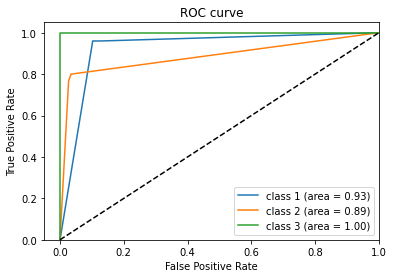

In [42]:
#auc_roc curve
auc_roc_curve(tr_model)

# **Experiment 4**
varying max_depth as 7 and taking other hyperparameters as default

In [43]:
tr_model=DecisionTreeClassifier(max_depth=11)
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.80      0.80      0.80        40
           3       0.90      0.90      0.90        10

    accuracy                           0.94       290
   macro avg       0.89      0.89      0.89       290
weighted avg       0.94      0.94      0.94       290



In [44]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9448275862068966
Precision score:  0.9448275862068966
Recall score:  0.9448275862068966
AUC_ROC score:  0.9158769841269842


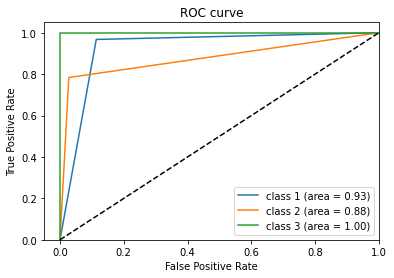

In [45]:
#auc_roc curve
auc_roc_curve(tr_model)

#**Experiment 5**
varying min_samples_leaf as 2 and taking other hyperparameters as default

In [46]:
tr_model=DecisionTreeClassifier(min_samples_leaf=5)
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       240
           2       0.78      0.80      0.79        40
           3       1.00      0.70      0.82        10

    accuracy                           0.94       290
   macro avg       0.91      0.82      0.86       290
weighted avg       0.94      0.94      0.94       290



In [47]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9379310344827586
Precision score:  0.9379310344827586
Recall score:  0.9379310344827586
AUC_ROC score:  0.9326531746031744


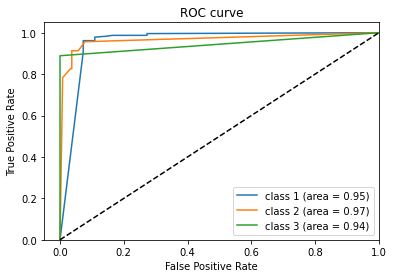

In [48]:
#auc_roc curve
auc_roc_curve(tr_model)

# **Experiment 6**
varying max features as sqrt and taking other hyperparameters as default

In [49]:
tr_model=DecisionTreeClassifier(max_features='sqrt')
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.96      0.97       240
           2       0.77      0.85      0.81        40
           3       0.67      0.60      0.63        10

    accuracy                           0.93       290
   macro avg       0.80      0.80      0.80       290
weighted avg       0.94      0.93      0.93       290



In [50]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9344827586206896
Precision score:  0.9344827586206896
Recall score:  0.9344827586206896
AUC_ROC score:  0.8736309523809523


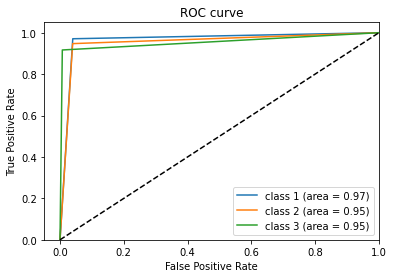

In [51]:
#auc_roc curve
auc_roc_curve(tr_model)

# **Experiment 7**

varying class weight as balanced and taking other hyperparameters as default

In [52]:
tr_model=DecisionTreeClassifier(class_weight='balanced')
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       240
           2       0.84      0.80      0.82        40
           3       0.89      0.80      0.84        10

    accuracy                           0.95       290
   macro avg       0.90      0.86      0.88       290
weighted avg       0.95      0.95      0.95       290



In [53]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9482758620689655
Precision score:  0.9482758620689655
Recall score:  0.9482758620689655
AUC_ROC score:  0.8985992063492064


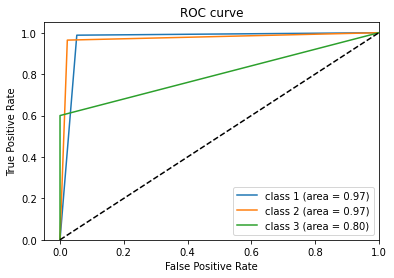

In [54]:
#auc_roc curve
auc_roc_curve(tr_model)

# **Experiment 8**

varying max leaf nodes and taking other hyperparameters as default



In [55]:
tr_model=DecisionTreeClassifier(max_leaf_nodes=20)
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       240
           2       0.79      0.82      0.80        40
           3       1.00      0.80      0.89        10

    accuracy                           0.94       290
   macro avg       0.92      0.87      0.89       290
weighted avg       0.95      0.94      0.95       290



In [56]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9448275862068966
Precision score:  0.9448275862068966
Recall score:  0.9448275862068966
AUC_ROC score:  0.9105753968253968


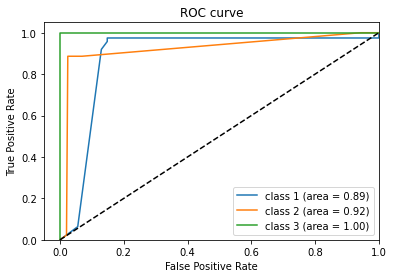

In [57]:
#auc_roc curve
auc_roc_curve(tr_model)

**Taking best obtained hyperparameters**

In [58]:
tr_model=tree.DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=7, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=20, random_state=0)
tr_model=tr_model.fit(X_train,y_train)
y_pred = tr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       240
           2       0.86      0.78      0.82        40
           3       1.00      0.70      0.82        10

    accuracy                           0.95       290
   macro avg       0.94      0.82      0.87       290
weighted avg       0.95      0.95      0.95       290



In [59]:
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = tr_model.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9482758620689655
Precision score:  0.9482758620689655
Recall score:  0.9482758620689655
AUC_ROC score:  0.9391551587301586


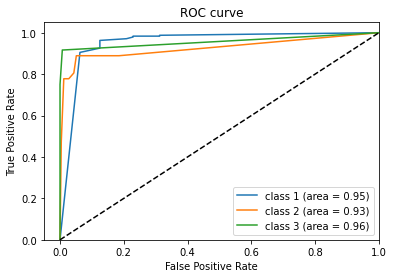

In [60]:
#auc_roc curve
auc_roc_curve(tr_model)

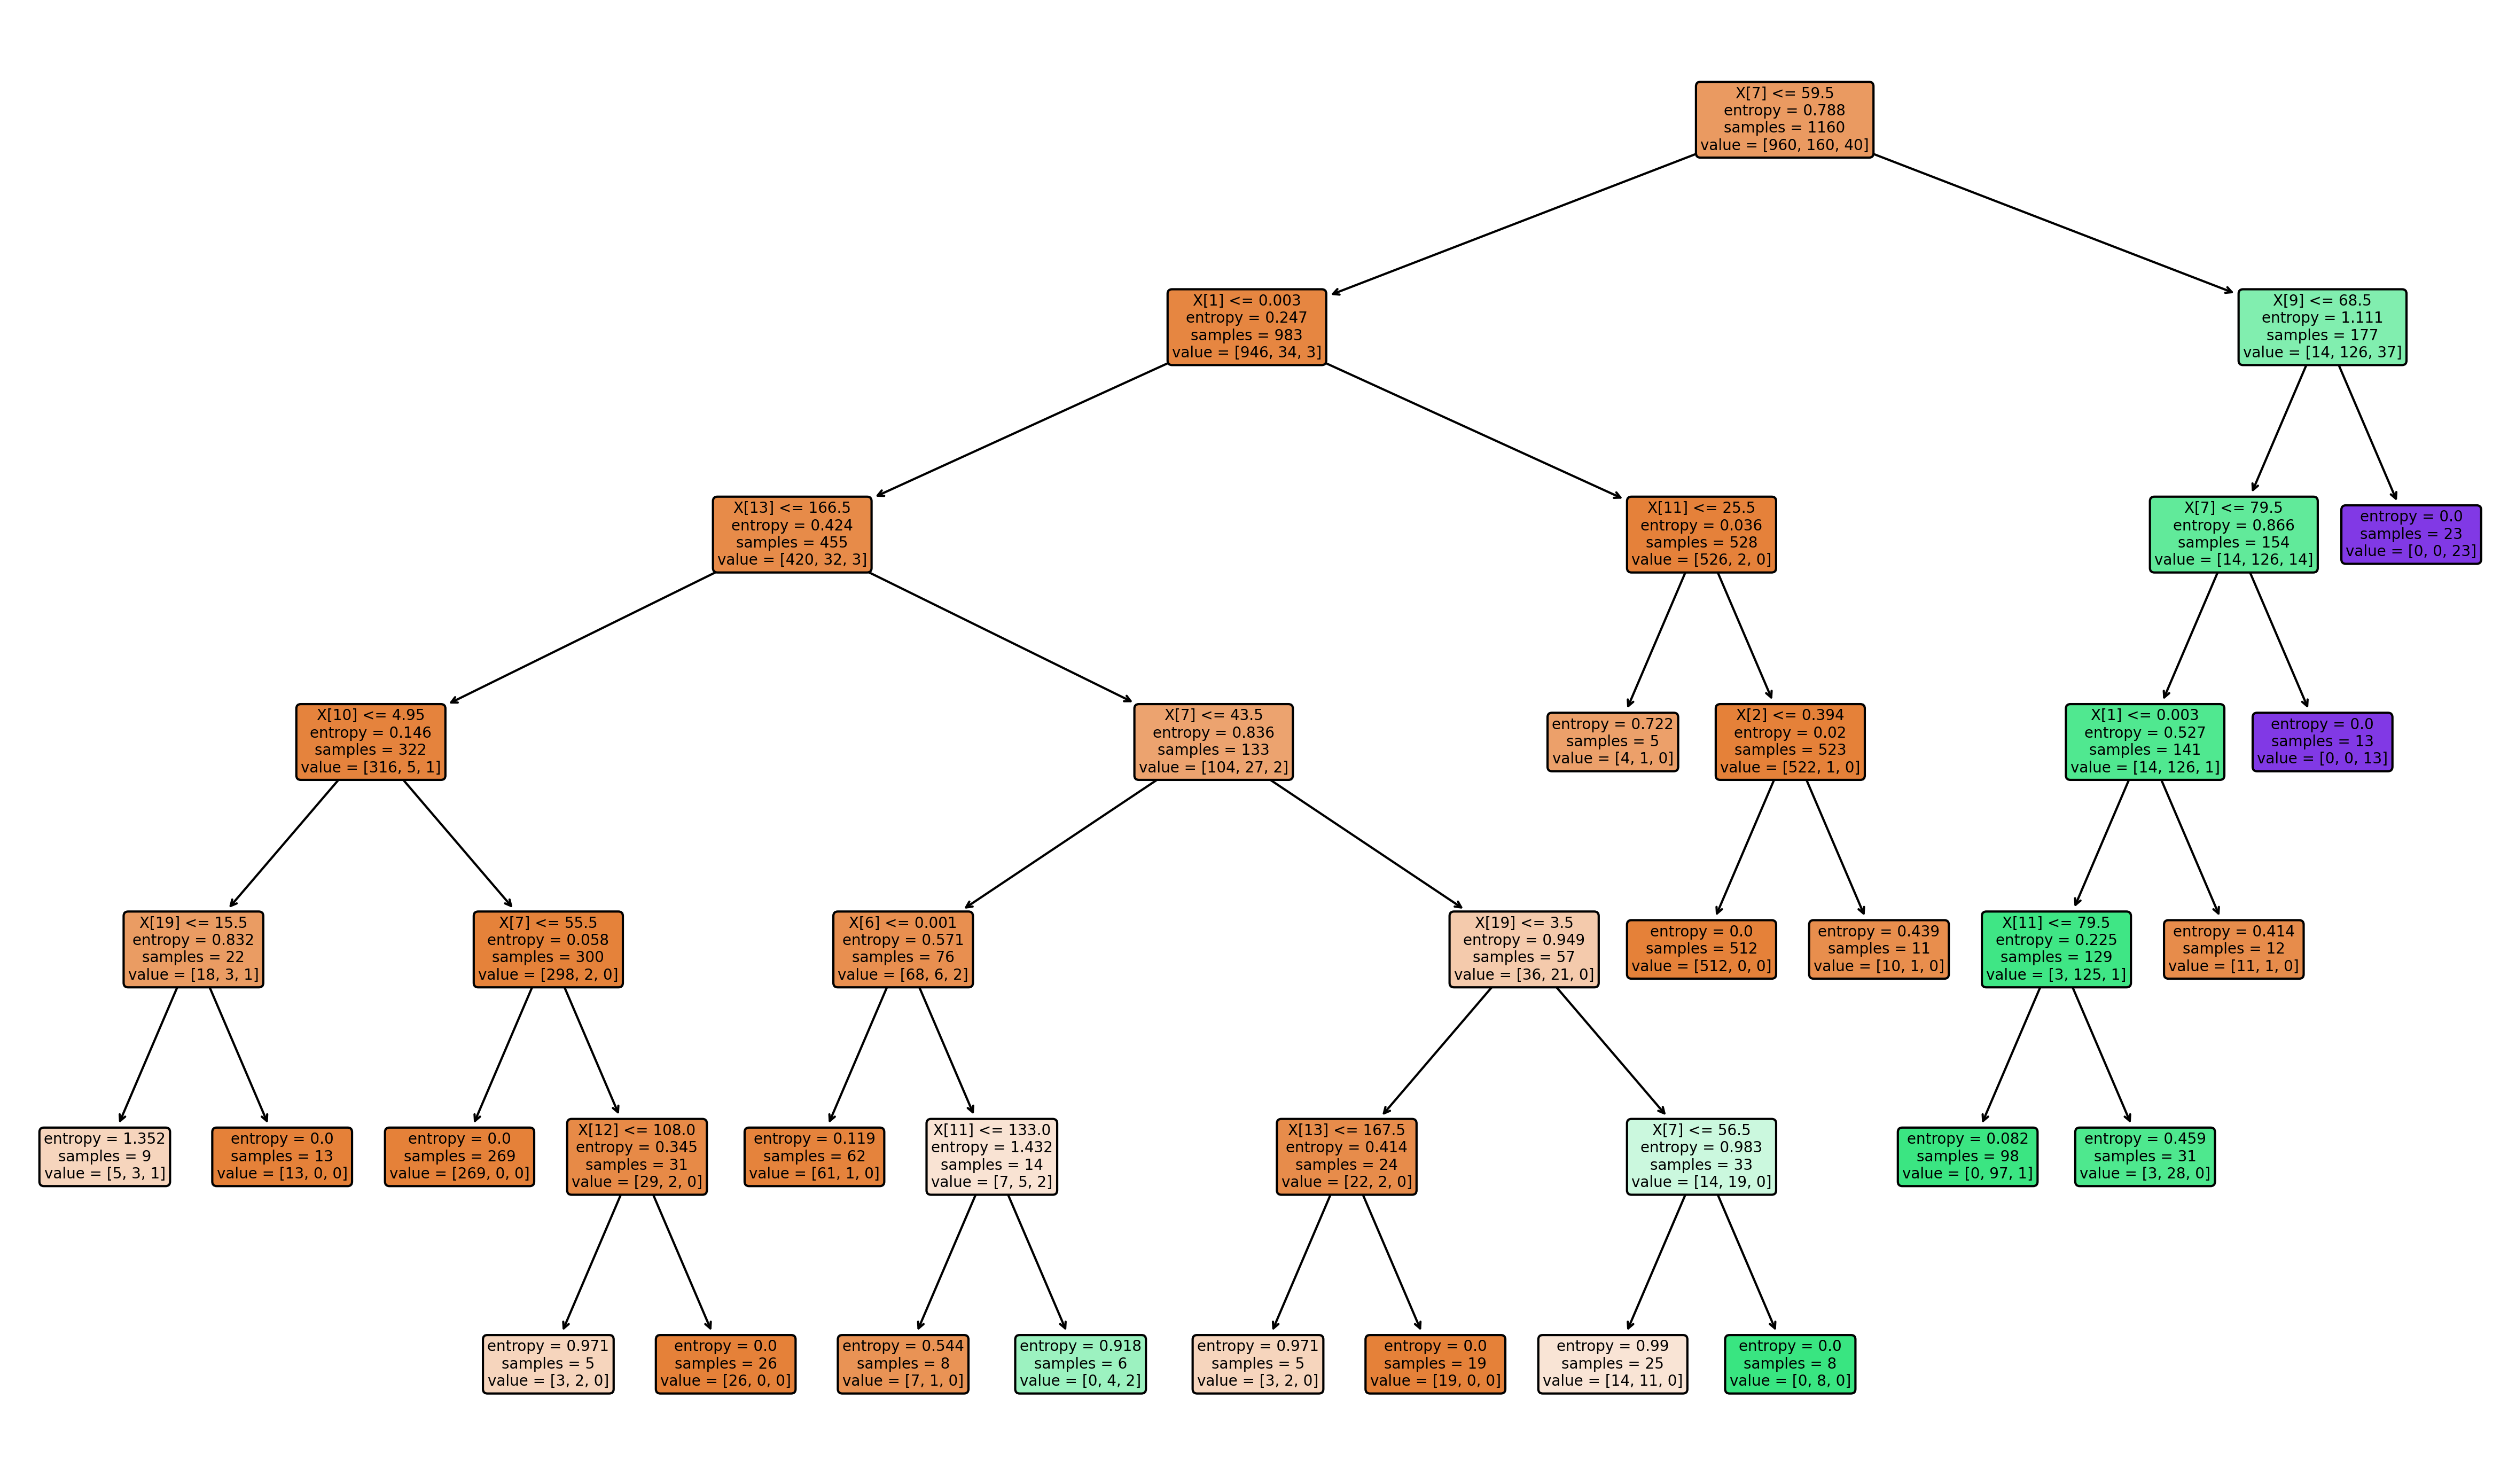

In [61]:
#visualize the decision tree
DT_A = plt.figure(figsize=(20,12), dpi=300)
tree.plot_tree(tr_model,rounded=True,filled=True)
plt.show()
#save the decision tree
DT_A.savefig('DT_A_2.png')

## **(B)**
## **Q1**
Remove a random node from the DT-A and observe the changes. Report your obser-
vations in terms of performance (precision, recall, AUC-ROC curve and accuracy) along with the tree diagram. Save the diagram as DT_B_1.png/pdf/jpg.

In [62]:
#DT_B_1 represents DT_A from (A)
DT_A = tr_model
DT_B_1 = DT_A

In [63]:
#fit the model
DT_B_1 = DT_B_1.fit(X_train,y_train)
#predict test result
y_pred = DT_B_1.predict(X_test)
#check node count
DT_B_1.tree_.node_count

39

In [64]:
#check id of left child
DT_B_1.tree_.children_left

array([ 1,  9,  3,  5, -1,  7, -1, 25, -1, 11, 35, 19, 13, 15, 17, -1, 21,
       33, 23, 29, 27, -1, -1, -1, -1, -1, -1, -1, 31, -1, -1, -1, -1, -1,
       -1, -1, 37, -1, -1])

In [65]:
#check id of right child
DT_B_1.tree_.children_right

array([ 2, 10,  4,  6, -1,  8, -1, 26, -1, 12, 36, 20, 14, 16, 18, -1, 22,
       34, 24, 30, 28, -1, -1, -1, -1, -1, -1, -1, 32, -1, -1, -1, -1, -1,
       -1, -1, 38, -1, -1])

In [66]:
#make children of random node as leaf nodes
DT_B_1.tree_.children_left[10]=-1
DT_B_1.tree_.children_right[10]=-1

In [67]:
#predict test result
y_pred = DT_B_1.predict(X_test)
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = DT_B_1.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9482758620689655
Precision score:  0.9482758620689655
Recall score:  0.9482758620689655
AUC_ROC score:  0.9373384920634921


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       240
           2       0.86      0.78      0.82        40
           3       1.00      0.70      0.82        10

    accuracy                           0.95       290
   macro avg       0.94      0.82      0.87       290
weighted avg       0.95      0.95      0.95       290



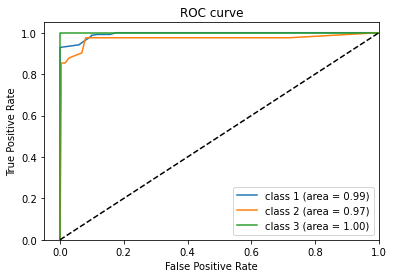

In [69]:
#auc_roc curve
auc_roc_curve(DT_B_1)

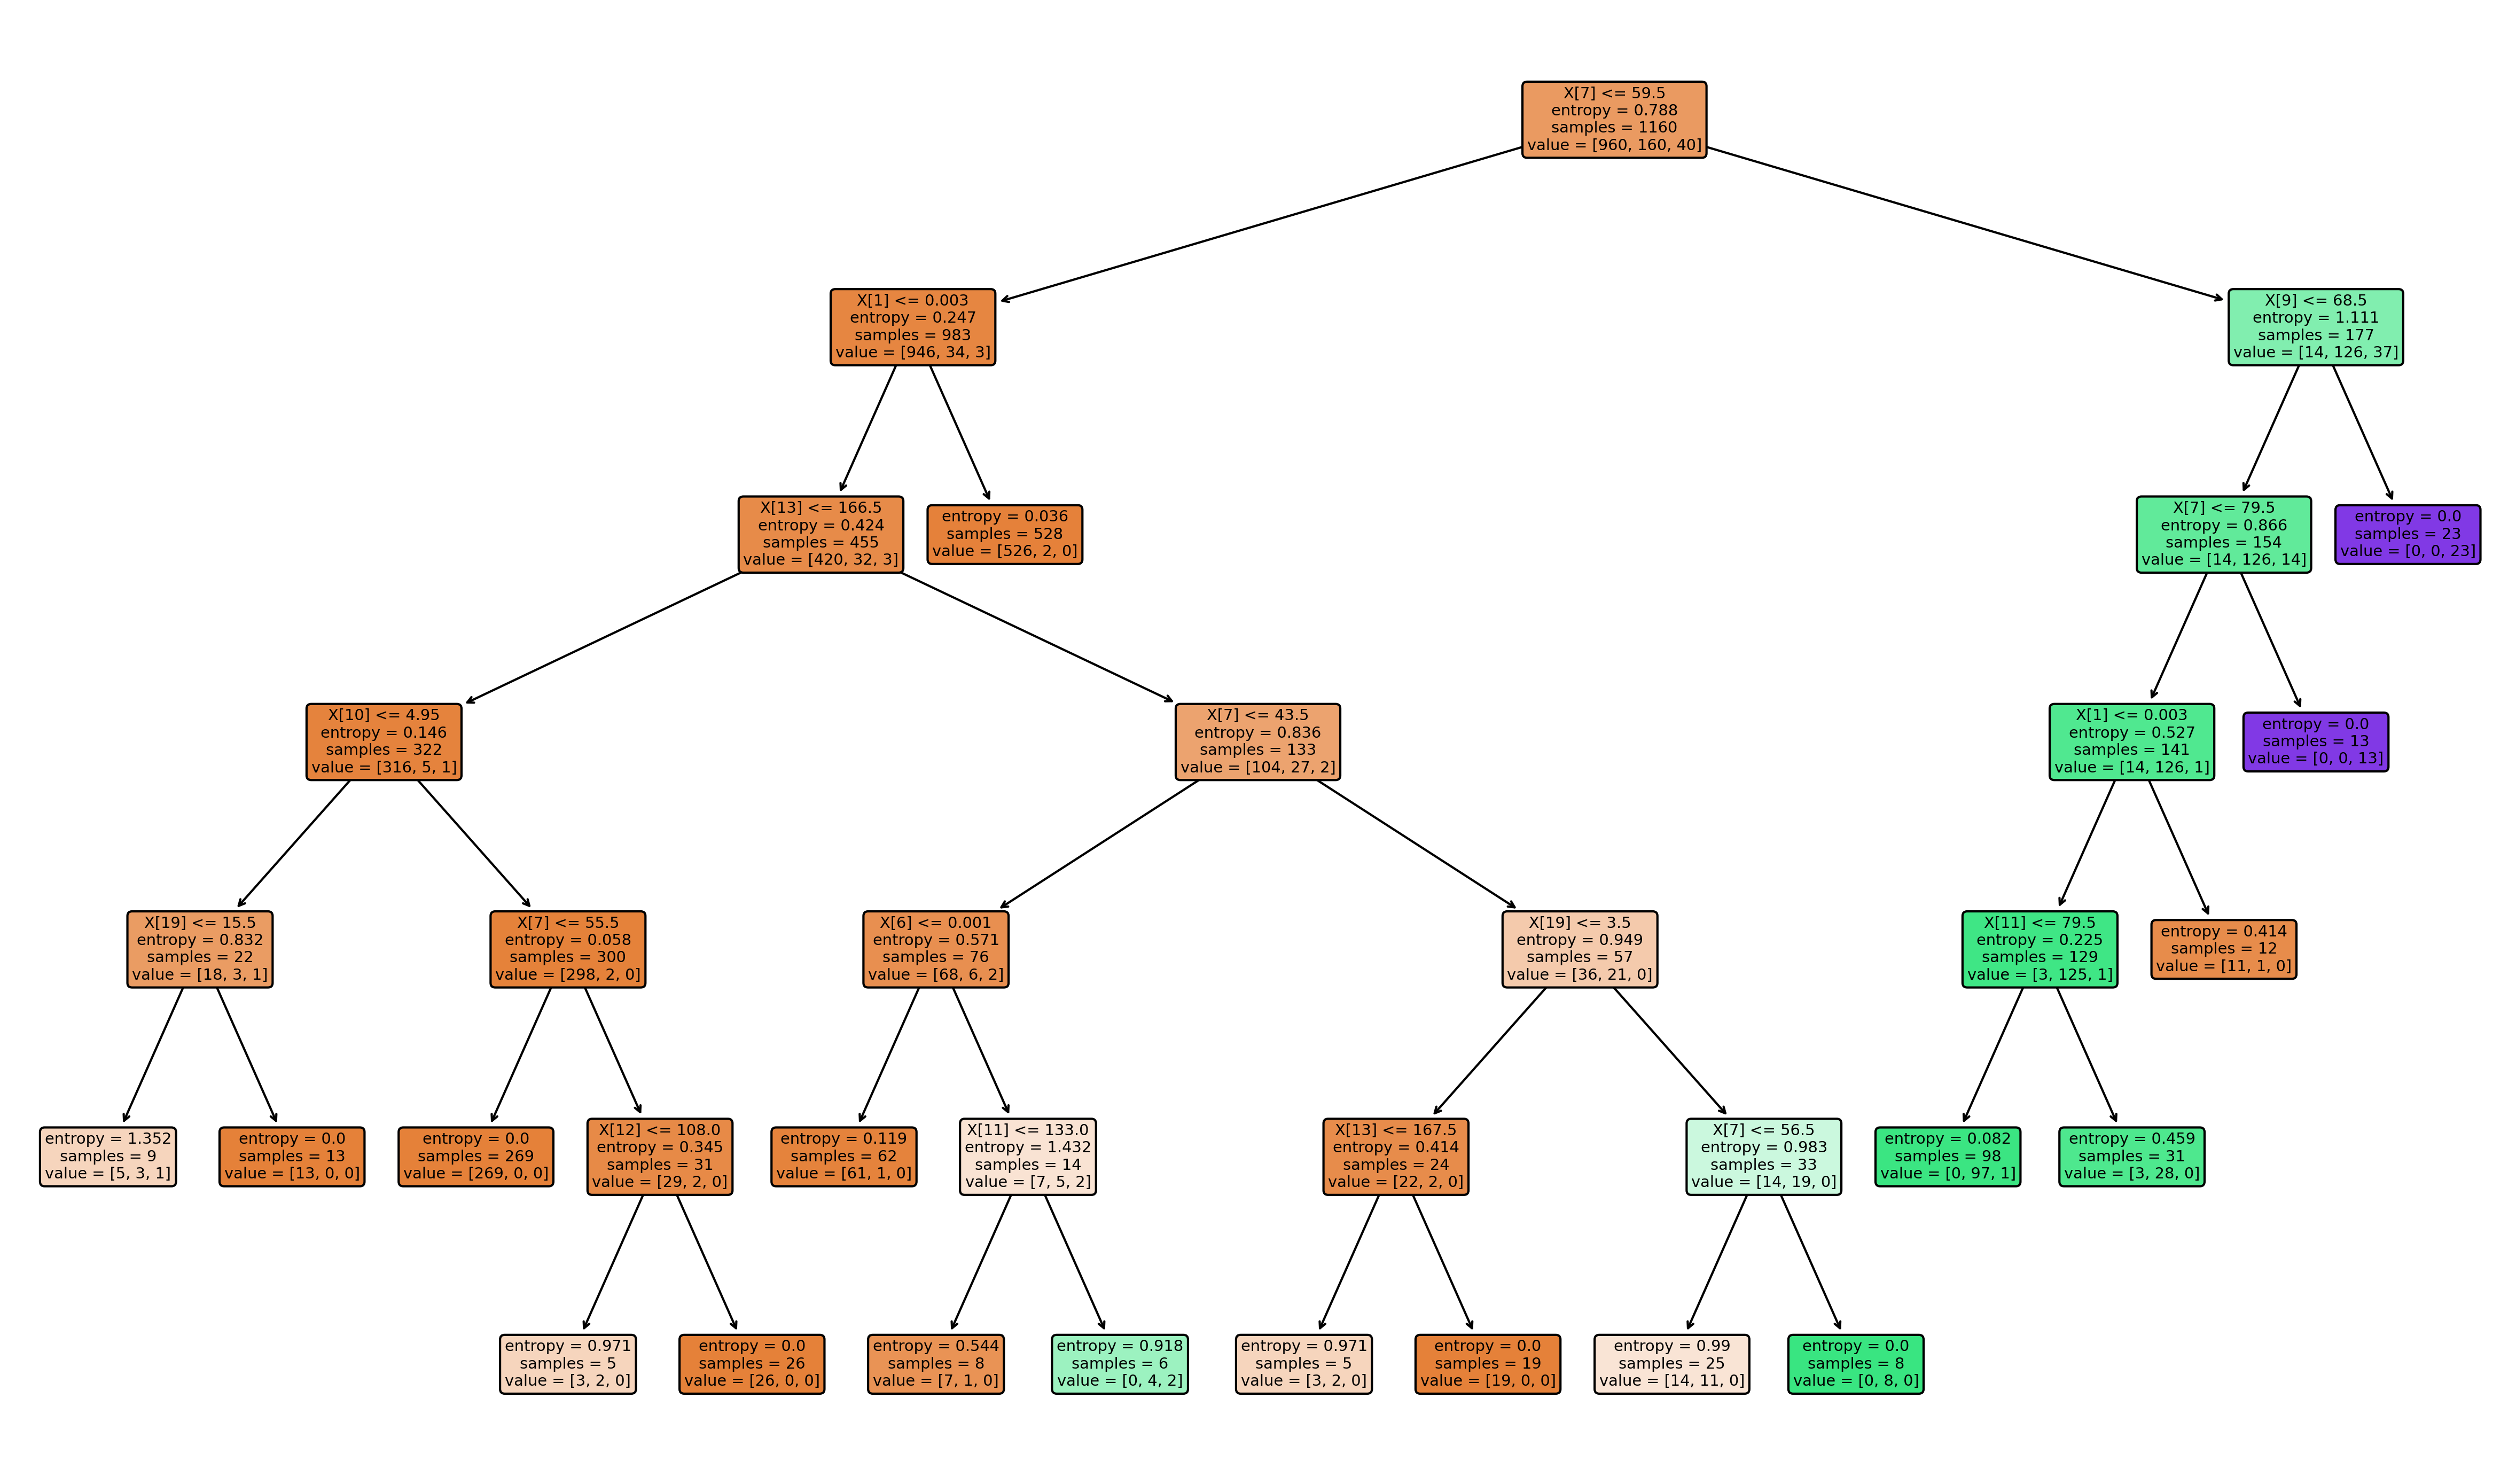

In [70]:
#visualize the decision tree
DT_B_1 = plt.figure(figsize=(20,12), dpi=300)
tree.plot_tree(tr_model,rounded=True,filled=True)
plt.show()
#save the decision tree
DT_B_1.savefig('DT_B_1.png')

## **(B) Q2**
Apply the Cost Complexity pruning technique and any other pruning technique of your choice on the DT obtained from part A (DT-A). Report the value of alpha for Cost Complexity Pruning and parameter values for the second pruning technique (ex. alpha, beta values if using Alpha-Beta pruning) and precision, recall and accuracy between the DT-A and the pruned trees. Visualize the DT-B-2-CC and DT-B-2-XX and save the image as DT_B_2_CC.png/pdf/jpg and DT_B_2_XX.png/pdf/jpg.

# **Cost complexity pruning / Post pruning technique**

In [71]:
path = DT_A.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#display values of alpha
print(ccp_alphas)

[0.         0.0043766  0.00453647 0.00503783 0.00528376 0.00571961
 0.00577682 0.00664804 0.00877893 0.00976167 0.01011702 0.0127496
 0.02819308 0.03474164 0.05095295 0.05451228 0.40919429]


In [72]:
#use list to append DT_A to each value of alpha
clfs = []
for ccp_alpha in ccp_alphas:
    DT_A = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=11, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=20, random_state=0, ccp_alpha=ccp_alpha)
    DT_A.fit(X_train, y_train)
    clfs.append(DT_A)

In [73]:
#check last tree
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.40919429425862286


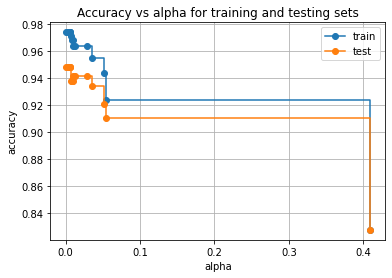

In [74]:
train_scores = [DT_A.score(X_train, y_train) for DT_A in clfs]
test_scores = [DT_A.score(X_test, y_test) for DT_A in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
ax.grid()
plt.show()
#taking alpha as 0.025

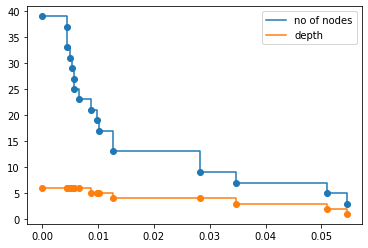

In [75]:
#remove trivial tree with one node obtained by the last values of clfs and ccp_alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [DT_A.tree_.node_count for DT_A in clfs]
depth = [DT_A.tree_.max_depth for DT_A in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()
#with increase in value of alpha, the number of nodes and depth is decreasing

In [76]:
#using updated value of alpha to evaluate performance
DT_A = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth=11, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=20, random_state=0, ccp_alpha=0.025)
DT_A.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.025, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [77]:
#predict test result
y_pred = DT_A.predict(X_test)
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = DT_A.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

#overcame the issue of overfitting in (A)

Accuracy score:  0.9413793103448276
Precision score:  0.9413793103448276
Recall score:  0.9413793103448276
AUC_ROC score:  0.9543027777777778


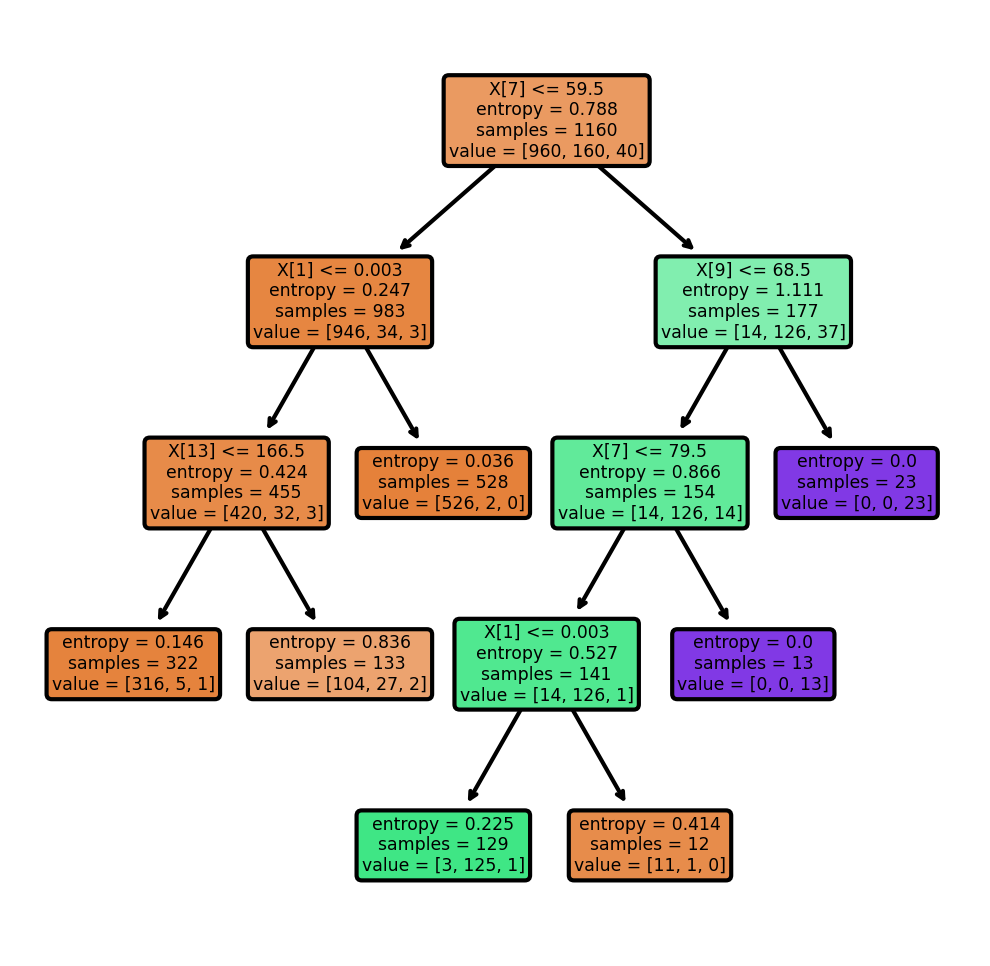

In [78]:
#visualize the decision tree
DT_B_2_CC = plt.figure(figsize=(4,4), dpi=300)
tree.plot_tree(DT_A,rounded=True,filled=True)
plt.show()
#save the decision tree
DT_B_2_CC.savefig('DT_B_2_CC.png')

# **Other pruning technique - Pre-pruning**

In [79]:
#tuning the hyper-parameters of an estimator using GridSearchCV
grid_param={"criterion":["gini","entropy"],"splitter":["best","random"],"max_depth":range(2,50,1),"min_samples_leaf":range(1,15,1),"min_samples_split":range(2,20,1) }

In [80]:
#taking the initial model from part A
DT_A = tr_model

In [81]:
#initializing GridSearchCV()
grid_search=GridSearchCV(estimator=DT_A,param_grid=grid_param,cv=5,n_jobs=-1)

In [82]:
grid_search.fit(X_train,y_train)
#getting the best hyper-parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 13, 'splitter': 'best'}


In [83]:
#using best obtained values
DT_A=tree.DecisionTreeClassifier(criterion= 'entropy',max_depth= 7,min_samples_leaf= 4,min_samples_split= 13,splitter= 'best')
DT_A.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=13,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
#predict test result
y_pred = DT_A.predict(X_test)
#accuracy score
print('Accuracy score: ',accuracy_score(y_test,y_pred))
#precision score 
print('Precision score: ',precision_score(y_test, y_pred, average='micro'))
#recall score average as micro
print('Recall score: ',recall_score(y_test, y_pred, average='micro'))
#auc roc score
y_pred_prob = DT_A.predict_proba(X_test)
print('AUC_ROC score: ',roc_auc_score(y_test, y_pred_prob, multi_class="ovr"))

Accuracy score:  0.9448275862068966
Precision score:  0.9448275862068966
Recall score:  0.9448275862068966
AUC_ROC score:  0.94145


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       240
           2       0.82      0.80      0.81        40
           3       1.00      0.70      0.82        10

    accuracy                           0.94       290
   macro avg       0.93      0.83      0.87       290
weighted avg       0.94      0.94      0.94       290



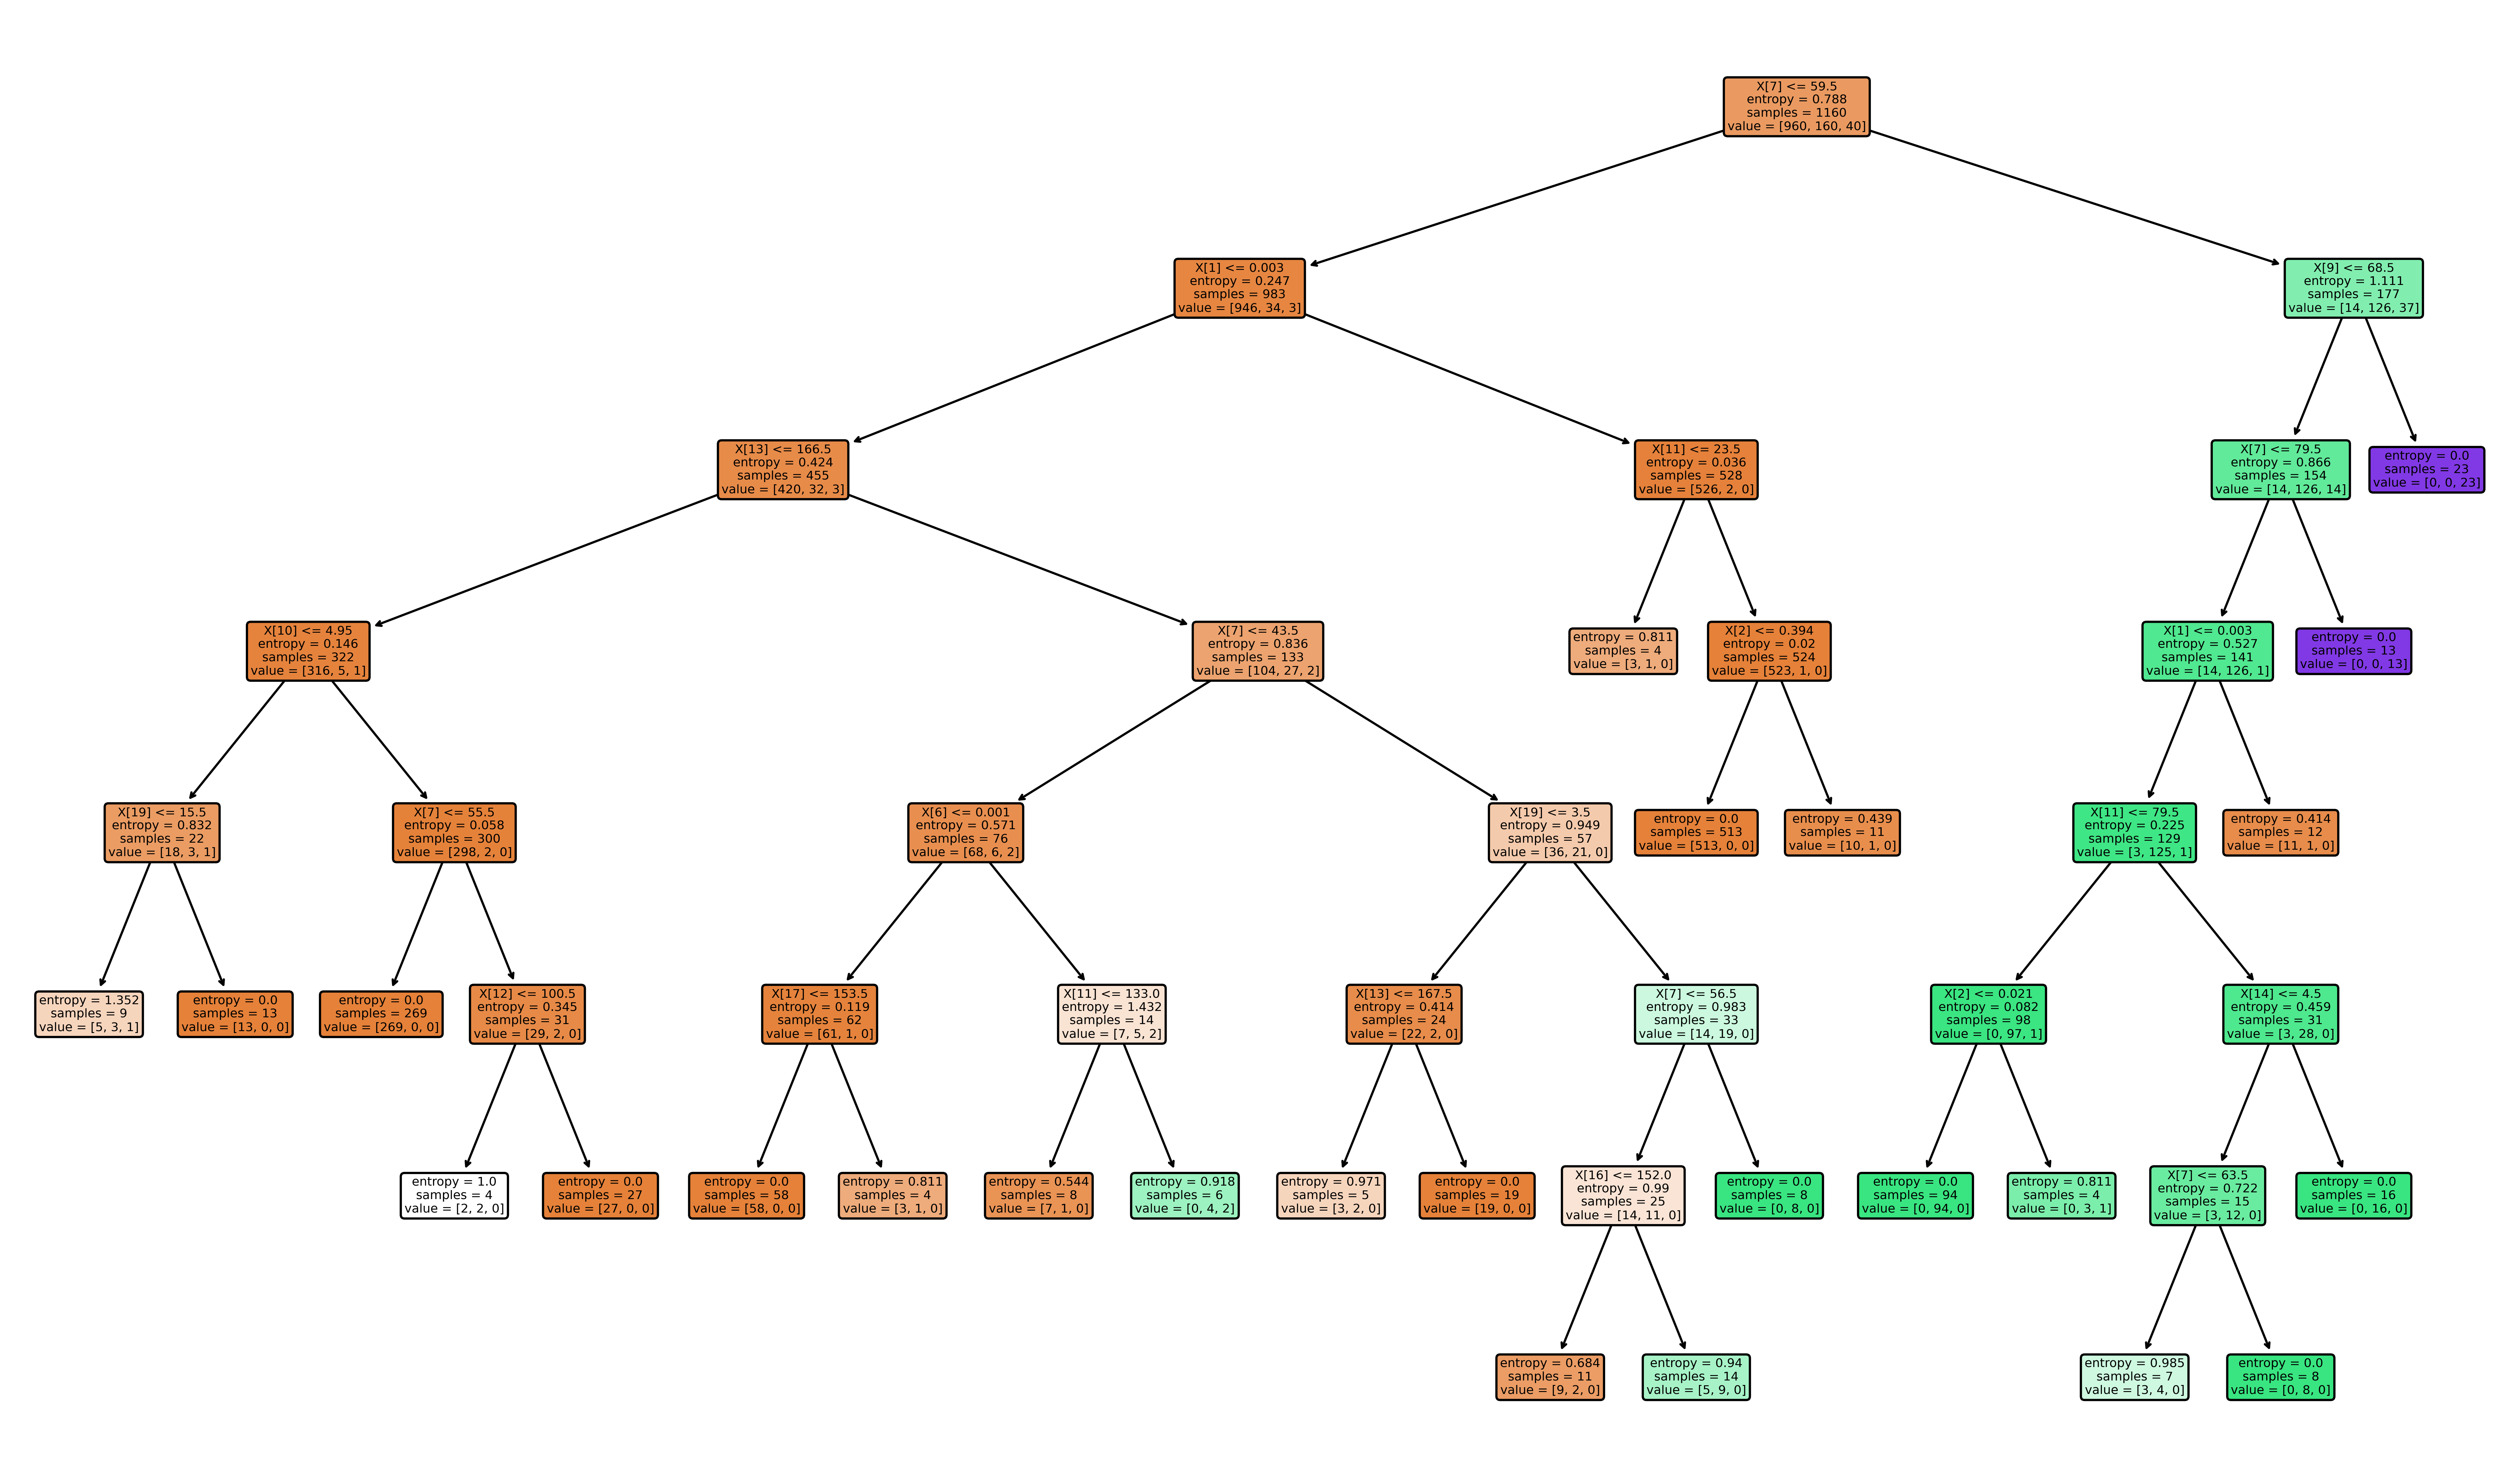

In [86]:
#visualize the decision tree
DT_B_2_XX = plt.figure(figsize=(20,12), dpi=500)
tree.plot_tree(DT_A,rounded=True,filled=True)
plt.show()
#save the decision tree
DT_B_2_XX.savefig('DT_B_2_XX.png')

##**(B) Q3**
Apply the Hybrid SLIQ pruning technique on DT-A and observe the performance
difference. Compare the tree size, precision, recall and accuracy for DT-A, DT-B-2-CC, DT-B-2-XX and DT-B-3 and report your observations. Save the best performing tree as DT_B_3.png/pdf/jpg.

In [87]:
import random
import sys

# **(C) Experiments**

# **(C) Q1**

Method 1: 

In [88]:
#import and read the data_2
df2 = pd.read_csv("data_2.csv")   

In [89]:
#check for null values
df2.isnull().sum() 

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [90]:
Xc = df2.drop('fetal_health', axis=1)
yc = df2['fetal_health']

In [91]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(Xc, yc, test_size=0.20, random_state=0, stratify=yc)

In [92]:
X_train_new=pd.concat([X_train, X_train_c])
y_train_new=pd.concat([y_train, y_train_c])

In [93]:
DT_C_1_X=DecisionTreeClassifier()
DT_C_1_X=DT_C_1_X.fit(X_train_new,y_train_new)
y_pred_1 = DT_C_1_X.predict(X_test)

In [94]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95       240
           2       0.72      0.70      0.71        40
           3       0.82      0.90      0.86        10

    accuracy                           0.92       290
   macro avg       0.83      0.85      0.84       290
weighted avg       0.92      0.92      0.92       290



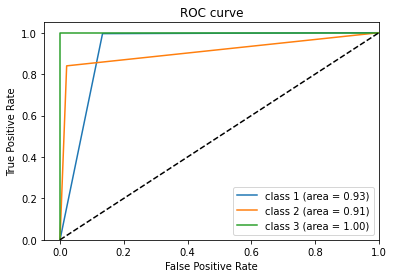

In [95]:
#auc_roc curve
auc_roc_curve(DT_C_1_X)

In [96]:
y_pred_2 = DT_C_1_X.predict(X_test_c)

In [97]:
print(classification_report(y_test_c, y_pred_2))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        92
           2       0.81      0.68      0.74        19
           3       0.92      0.88      0.90        25

    accuracy                           0.90       136
   macro avg       0.88      0.84      0.86       136
weighted avg       0.90      0.90      0.90       136



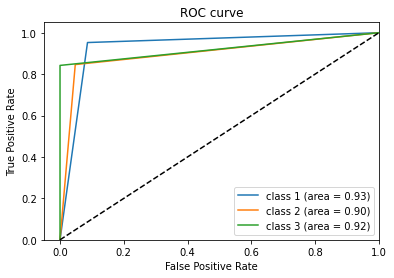

In [98]:
#auc_roc curve
auc_roc_curve(DT_C_1_X)

Method 2: Using VFDT (Very fast decision tree)

In [99]:
pip install scikit-multiflow

In [159]:
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.trees import HoeffdingTree
from skmultiflow.data import DataStream 

In [136]:
df2 = pd.read_csv("data_2.csv")  

In [151]:
X2 = df2.drop('fetal_health', axis=1)
y2 = df2['fetal_health']

In [152]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(Xc, yc, test_size=0.20, random_state=0, stratify=yc)

In [157]:
res = []

In [158]:
from skmultiflow.trees import HoeffdingTree

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

/usr/local/lib/python3.7/dist-packages/skmultiflow/trees/hoeffding_tree.py:35: FutureWarning: 'HoeffdingTree' has been renamed to 'HoeffdingTreeClassifier' in v0.5.0.
The old name will be removed in v0.7.0
  "The old name will be removed in v0.7.0", category=FutureWarning)


Score when fitting at once: 0.8362068965517241
Score when streaming after 0 samples: 0.0
Score when streaming after 1 samples: 0.8362068965517241
(Almost) full score reached! Continue for another 19 samples.
Score when streaming after 2 samples: 0.8362068965517241
(Almost) full score reached! Continue for another 18 samples.
Score when streaming after 3 samples: 0.8362068965517241
(Almost) full score reached! Continue for another 17 samples.
Score when streaming after 4 samples: 0.8362068965517241
(Almost) full score reached! Continue for another 16 samples.
Score when streaming after 5 samples: 0.8362068965517241
(Almost) full score reached! Continue for another 15 samples.
Score when streaming after 6 samples: 0.8362068965517241
(Almost) full score reached! Continue for another 14 samples.
Score when streaming after 7 samples: 0.8362068965517241
(Almost) full score reached! Continue for another 13 samples.
Score when streaming after 8 samples: 0.8362068965517241
(Almost) full score r

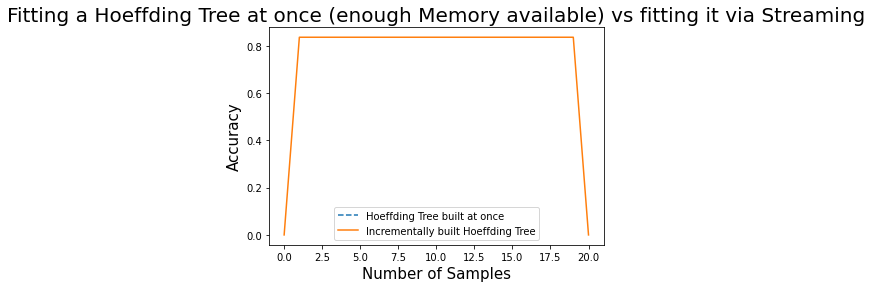

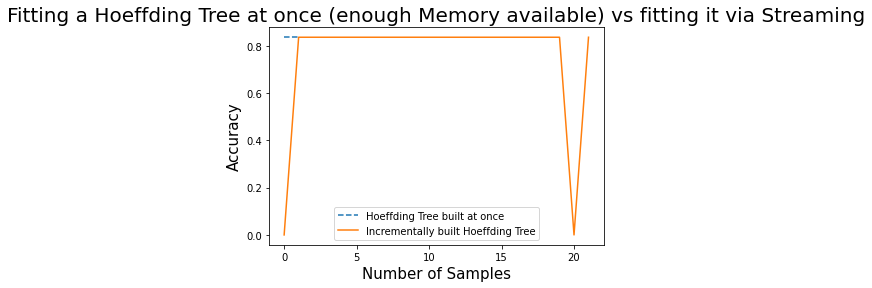

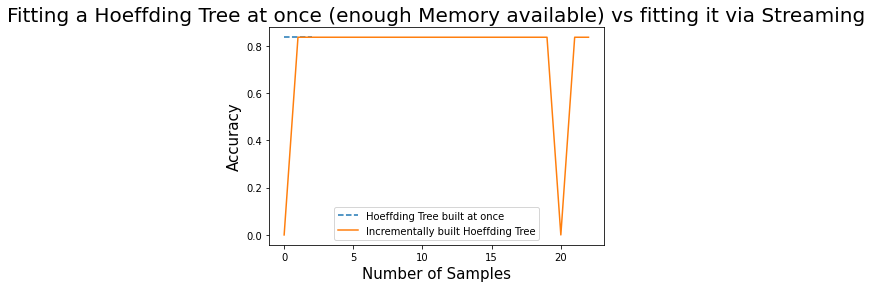

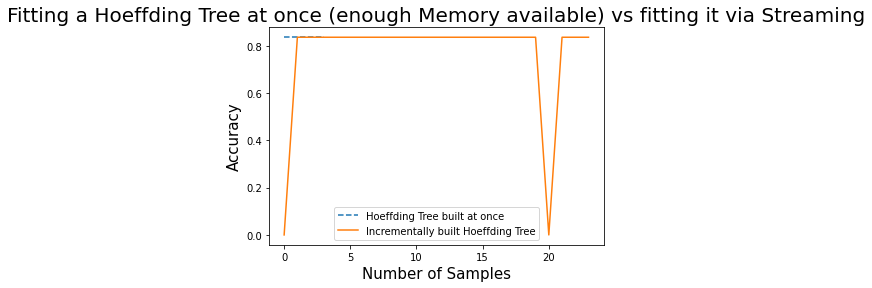

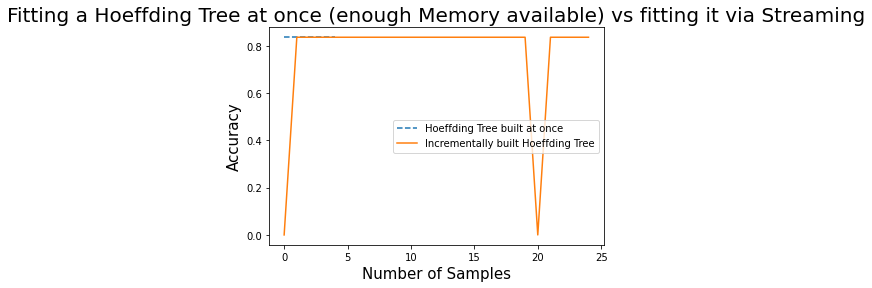

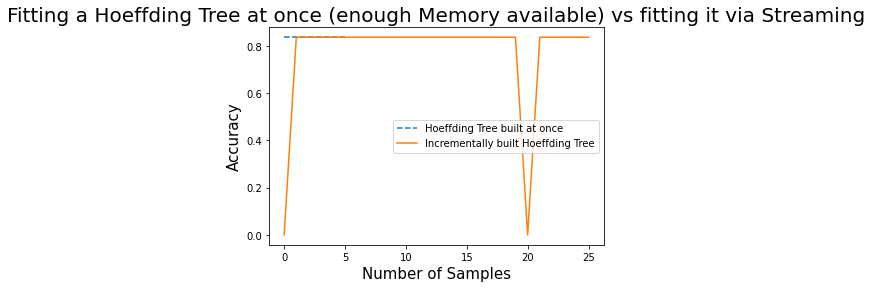

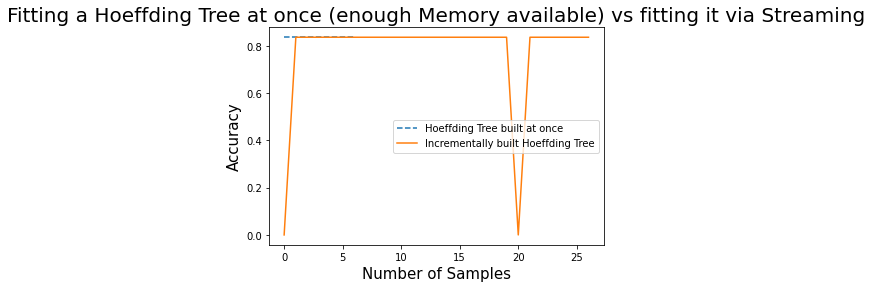

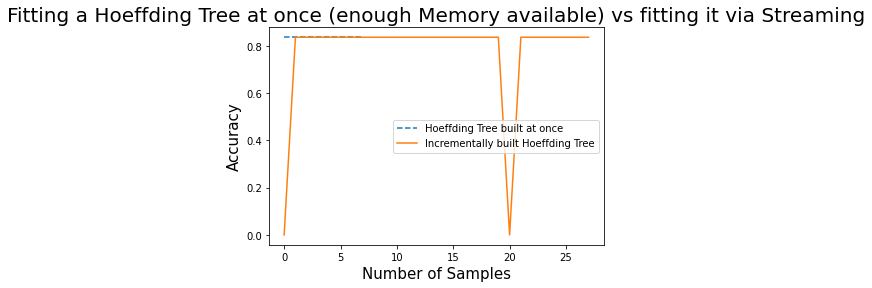

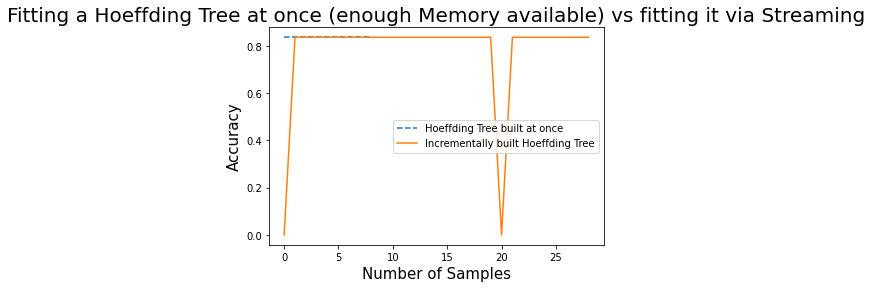

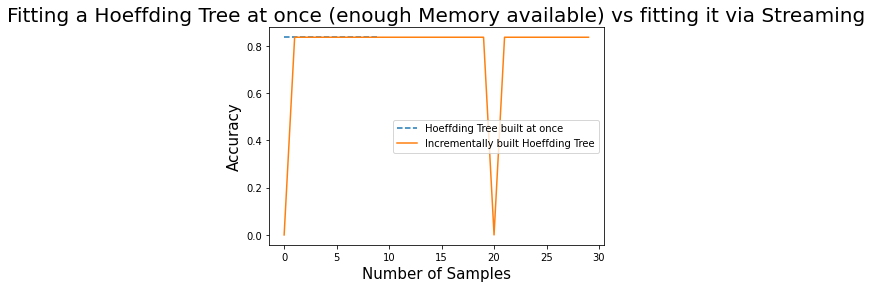

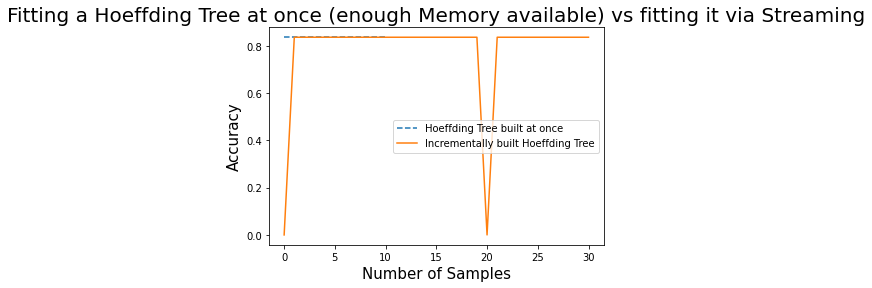

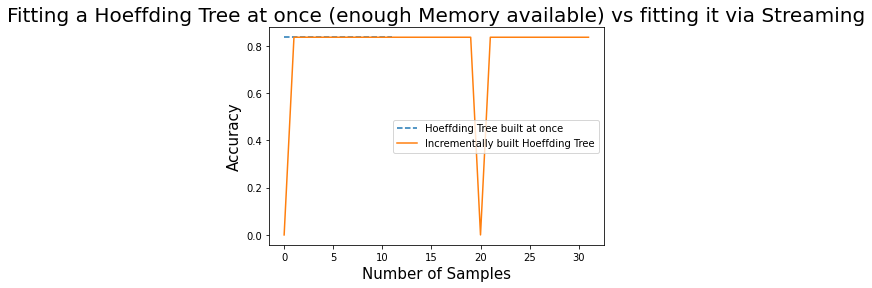

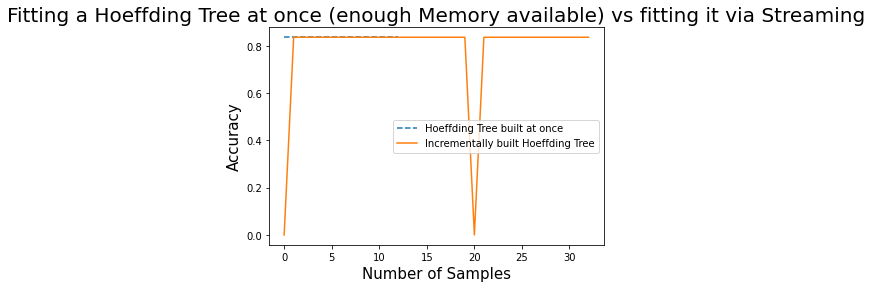

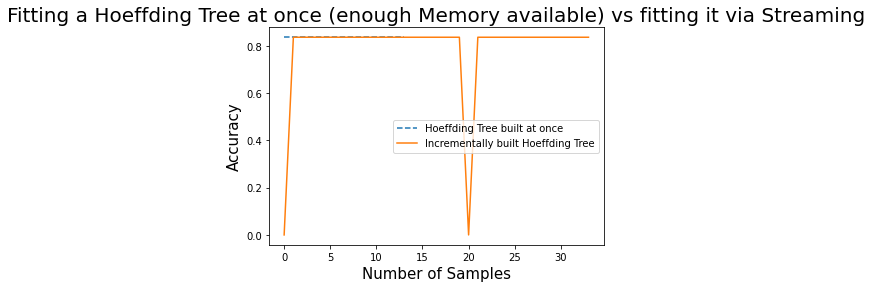

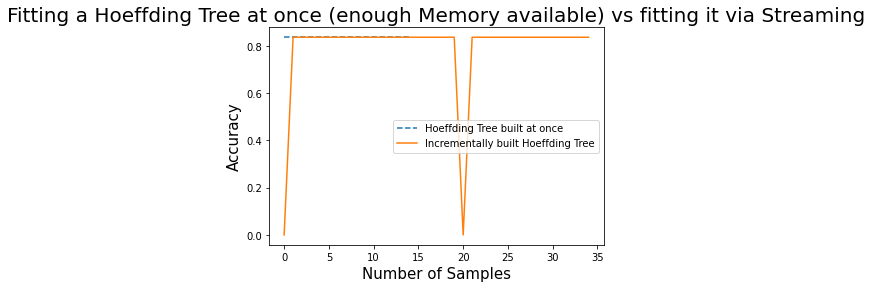

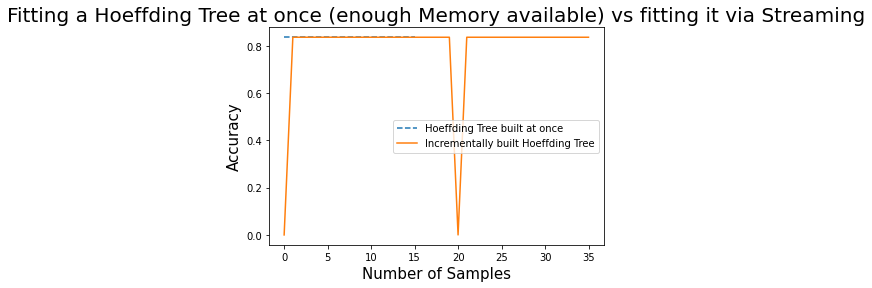

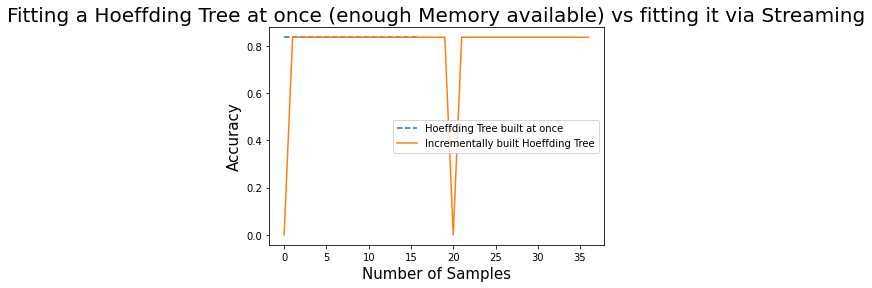

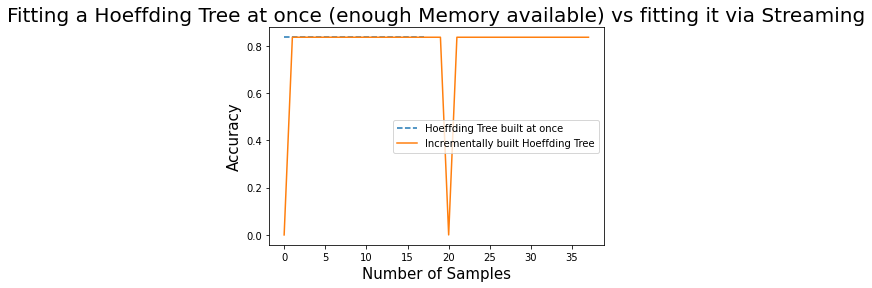

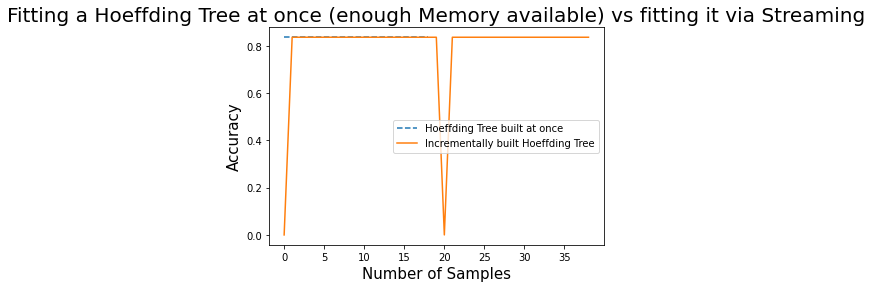

In [165]:
ht_complete = HoeffdingTree()
ht_partial = HoeffdingTree()
ht_complete.fit(X_train, y_train)
ht_complete_score = ht_complete.score(X_test, y_test)
print(f'Score when fitting at once: {ht_complete_score}')
timer = False
j = 0
for i in range(len(X_train)):
 ht_partial.partial_fit(X_train[i].reshape(1, -1),np.array([y_train[i]]))
 res.append(ht_partial.score(X_test, y_test))
 print(f'Score when streaming after {i} samples: {res[-1]}')
 if res[-1] >= ht_complete_score - 0.01:
  print(f'(Almost) full score reached! Continue for another {20 - j} samples.')
 timer = True
 if timer:
  j += 1
  if j == 20:
   break
  plt.figure(figsize=(6, 4))
  plt.plot([0, i], [ht_complete_score, ht_complete_score], '--',
  label='Hoeffding Tree built at once')
  plt.plot(res, label='Incrementally built Hoeffding Tree')
  plt.xlabel('Number of Samples', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Fitting a Hoeffding Tree at once (enough Memory available) vs fitting it via Streaming', fontsize=20)
  plt.legend()

## **(C) Q2**
Visualize the decision surface boundaries of the DT obtained from Part B Q3. Find
the distance of a sample to the nearest decision boundary of decision tree.

In [112]:
x1=df
x1=x1.drop(['fetal_health'], axis=1)
y=df['fetal_health']

In [113]:
from itertools import combinations
attr = x1.columns
r=list(range(21))
collect=list(combinations(r,2))

ValueError: ignored

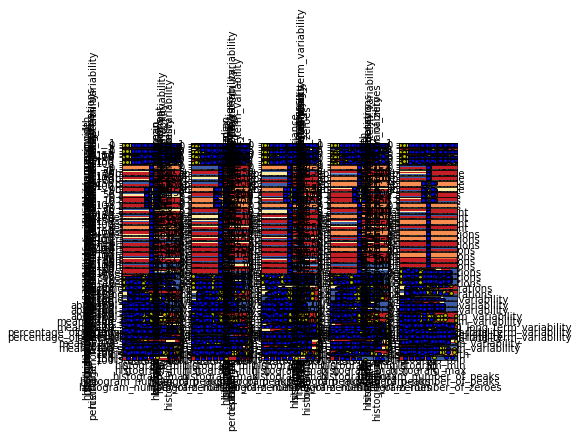

In [118]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.1
for pairidx, pair in enumerate(collect):
    # We only take the two corresponding features
   
    X=np.array(X_train.iloc[:,list(pair)])
    y=np.array(y_train)   
    DT_A.fit(X,y)
    # Plot the decision boundary
    plt.subplot(40,5, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = DT_A.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(attr[pair[0]])
    plt.ylabel(attr[pair[1]])
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i+1,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.figure()
plt.show()

In [166]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(ht_complete,f)